# 3.6.5 - Predicting Cancer

   1. Sample code number            
   2. Clump Thickness               
   3. Uniformity of Cell Size       
   4. Uniformity of Cell Shape      
   5. Marginal Adhesion             
   6. Single Epithelial Cell Size   
   7. Bare Nuclei                   
   8. Bland Chromatin               
   9. Normal Nucleoli               
   10. Mitoses                       
   11. Class                        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

wf = r'C:\Users\206547663\Documents\Python\DS\Data\Cancer.csv'
f = r'C:\Users\Abe\Documents\Data Science Data\Cancer.csv'

col_names = ['id',
             'clump_thickness',
             'uniformity_cell_size',
             'uniformity_cell_shape',
             'adhesion',
             'single_cell_size',
             'bare_nuclei',
             'chromatin',
             'normal_nucleoli',
             'mitoses',
             'class']

df = pd.read_csv(f,sep=',',header=None,usecols=range(1,11,1),names=col_names,na_values='?')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
adhesion                 699 non-null int64
single_cell_size         699 non-null int64
bare_nuclei              699 non-null object
chromatin                699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [3]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [4]:
df = df[df['bare_nuclei'] != '?']
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness          683 non-null int64
uniformity_cell_size     683 non-null int64
uniformity_cell_shape    683 non-null int64
adhesion                 683 non-null int64
single_cell_size         683 non-null int64
bare_nuclei              683 non-null int64
chromatin                683 non-null int64
normal_nucleoli          683 non-null int64
mitoses                  683 non-null int64
class                    683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


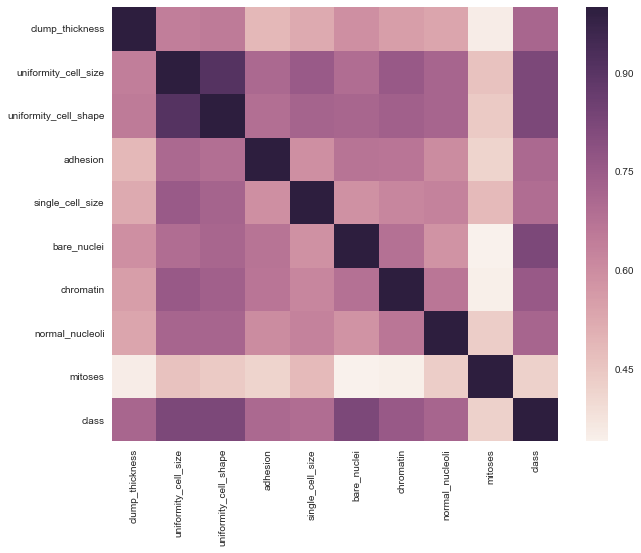

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

C:\Users\Abe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


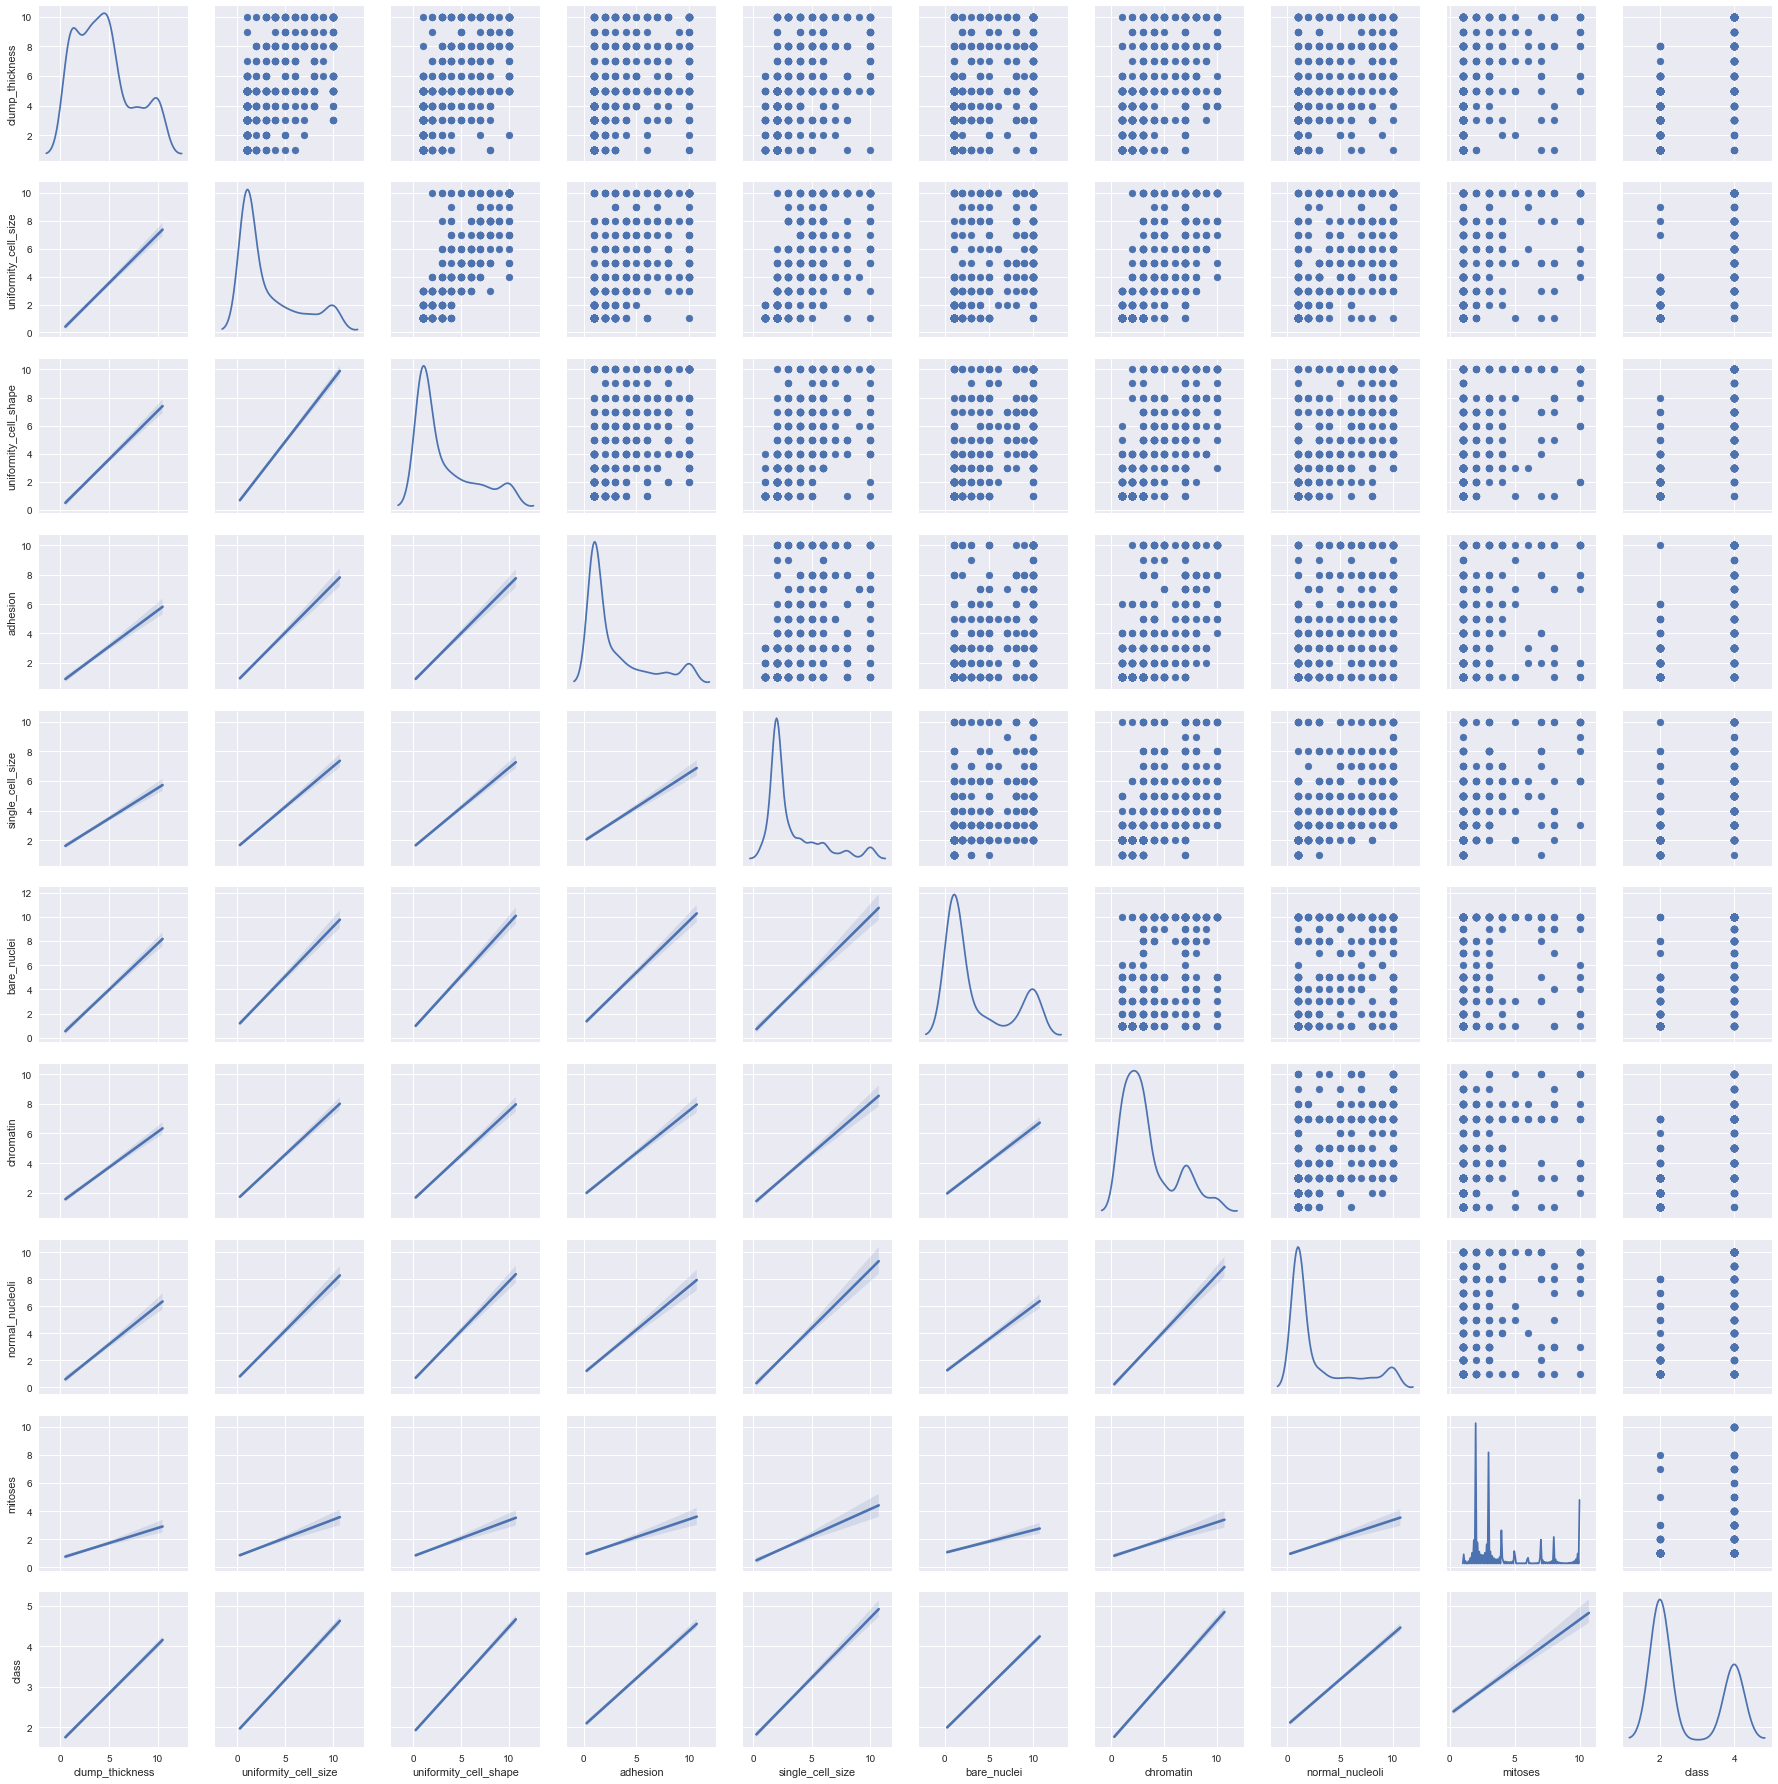

In [6]:
pg = sns.PairGrid(df, diag_sharey=False)
pg.map_upper(plt.scatter)
pg.map_lower(sns.regplot,scatter_kws=(dict(alpha=0)))
pg.map_diag(sns.kdeplot)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df.loc[:,df.columns != 'class']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knc = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knc,X,y, cv=10).mean()

0.97233525467292703

In [10]:
from sklearn.metrics import confusion_matrix

knc.fit(X_train,y_train)
y_predict = knc.predict(X_train)

confusion_matrix(y_train, y_predict)

array([[345,   8],
       [  3, 190]])

In [13]:
knc.fit(X_test,y_test)
y_predict = knc.predict(X_test)


print(knc.score(X_test,y_test))
confusion_matrix(y_test, y_predict)

0.985401459854


array([[90,  1],
       [ 1, 45]])

In [10]:
from sklearn.svm import SVC

svc = SVC(C=2)

cross_val_score(svc,X,y,cv=10).mean()

0.95920652492015623